In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, extract

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

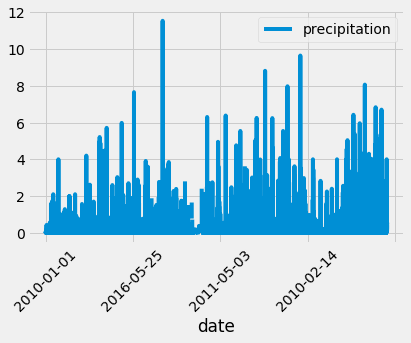

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
#start_date = dt.date(*, 6, 1)
#end_date = dt.date(*, 6, 30)
# Perform a query to retrieve the data and precipitation scores
results = []

results = session.query(Measurement.date, Measurement.prcp)
#(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
#print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
#print(df.to_string(index=False))
df.sort_index()
#print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=45)

In [12]:
df.columns

Index(['date', 'precipitation'], dtype='object')

In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df.dtypes

date             datetime64[ns]
precipitation           float64
dtype: object

In [15]:
june_precip = df.loc[df['date'].dt.month == 6]

In [16]:
june_precip.to_string()

'                 date  precipitation\ndate                                \n2010-06-01 2010-06-01           0.00\n2010-06-02 2010-06-02           0.01\n2010-06-03 2010-06-03           0.00\n2010-06-04 2010-06-04           0.00\n2010-06-05 2010-06-05           0.00\n2010-06-06 2010-06-06           0.00\n2010-06-07 2010-06-07           0.00\n2010-06-08 2010-06-08           0.00\n2010-06-09 2010-06-09           0.00\n2010-06-10 2010-06-10           0.00\n2010-06-11 2010-06-11           0.00\n2010-06-12 2010-06-12           0.00\n2010-06-13 2010-06-13           0.00\n2010-06-14 2010-06-14           0.00\n2010-06-15 2010-06-15           0.00\n2010-06-16 2010-06-16           0.00\n2010-06-17 2010-06-17           0.00\n2010-06-18 2010-06-18           0.00\n2010-06-19 2010-06-19           0.00\n2010-06-20 2010-06-20           0.00\n2010-06-21 2010-06-21           0.00\n2010-06-22 2010-06-22           0.00\n2010-06-23 2010-06-23           0.00\n2010-06-24 2010-06-24           0.00\n2010-06-25 

In [17]:
december_precip = df.loc[df['date'].dt.month == 12]

In [18]:
december_precip.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [19]:
print(june_precip.to_string(index=False))

      date  precipitation
2010-06-01           0.00
2010-06-02           0.01
2010-06-03           0.00
2010-06-04           0.00
2010-06-05           0.00
2010-06-06           0.00
2010-06-07           0.00
2010-06-08           0.00
2010-06-09           0.00
2010-06-10           0.00
2010-06-11           0.00
2010-06-12           0.00
2010-06-13           0.00
2010-06-14           0.00
2010-06-15           0.00
2010-06-16           0.00
2010-06-17           0.00
2010-06-18           0.00
2010-06-19           0.00
2010-06-20           0.00
2010-06-21           0.00
2010-06-22           0.00
2010-06-23           0.00
2010-06-24           0.00
2010-06-25           0.00
2010-06-26           0.02
2010-06-27           0.00
2010-06-28           0.00
2010-06-29           0.00
2010-06-30           0.00
2011-06-01           0.07
2011-06-02           0.00
2011-06-03           0.56
2011-06-04           0.89
2011-06-05           0.00
2011-06-06           0.00
2011-06-07           0.00
2011-06-08  

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [21]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()


[(9)]

In [22]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= prev_year).all()
print(results)

NameError: name 'prev_year' is not defined

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
df = pd.DataFrame(results, columns=['tobs'])
df.head()
df.plot.hist(bins=20, rot= 45)
plt.tight_layout()

# Challenge